In [1]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

2.0.1+cu118
False


In [2]:
import urllib.request
url = 'https://upload.wikimedia.org/wikipedia/commons/4/45/A_small_cup_of_coffee.JPG'
fpath = 'coffee.jpg'
urllib.request.urlretrieve(url, fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x7b3a330900a0>)

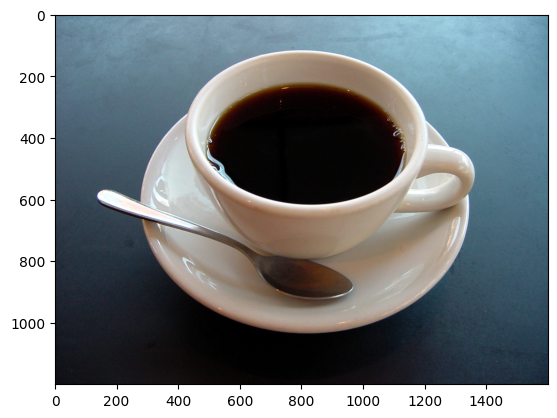

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

img =  Image.open('coffee.jpg')
plt.imshow(img)

In [4]:
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.255])
    ])

img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [5]:
batch = torch.unsqueeze(img_tensor, 0)
print(batch.shape)

torch.Size([1, 3, 224, 224])


In [6]:
from torchvision import models
model = models.alexnet(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 79.7MB/s]


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)

cpu
torch.Size([1, 1000])


In [8]:
y_max, index = torch.max(y,1)
print(index, y_max)

tensor([967]) tensor([20.7831], grad_fn=<MaxBackward0>)


In [9]:
import urllib.request
url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = "imagenet_class_labels.txt"
urllib.request.urlretrieve(url, fpath)

with open("imagenet_class_labels.txt") as f:
    classes = [line.strip() for line in f.readlines()]

print(classes[967])

967: 'espresso',


In [10]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())

967: 'espresso', 79.49543762207031


In [11]:
_, indices = torch.sort(y, descending = True)
for idx in indices[0][:5]:
    print(classes[idx], prob[idx].item())

967: 'espresso', 79.49543762207031
968: 'cup', 14.26144790649414
504: 'coffee mug', 5.409443378448486
925: 'consomme', 0.5175624489784241
960: 'chocolate sauce, chocolate syrup', 0.1373642385005951
